<a href="https://colab.research.google.com/github/jae-hyuck/dl13/blob/main/notebook/ch05_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ch05 Perceptron

### 파이썬 코어로 구현 (기본 파이썬으로 구현)
 - AND연산

In [ ]:
epsilon = 0.0000001

def perceptron(x1, x2):
    w1, w2, b = 1.0, 1.0, -1.5
    sum = x1*w1+x2*w2+b
    if sum > epsilon :		# 부동소수점 오차를 방지하기 위하여
        return 1
    else :
        return 0
    
print(perceptron(0, 0))
print(perceptron(1, 0))
print(perceptron(0, 1))
print(perceptron(1, 1))

### Numpy로 퍼셉트론 구현
 - AND연산

In [ ]:
import numpy as np
epsilon = 0.0000001

def perceptron(x1, x2):
    X = np.array([x1, x2])
    W = np.array([1.0, 1.0])
    B = -1.5
    sum = np.dot(W, X)+B
    if sum > epsilon :
        return 1
    else :
        return 0

print(perceptron(0, 0))
print(perceptron(1, 0))
print(perceptron(0, 1))
print(perceptron(1, 1))


### Numpy로 퍼셉트론 학습
 - fit()
 - predict()


In [ ]:
import numpy as np

epsilon = 0.0000001		# 부동소수점 오차 방지

def step_func(t):		# 퍼셉트론의 활성화 함수
    if t > epsilon: return 1
    else: return 0

X = np.array([			# 훈련 데이터 세트
    [0, 0, 1],			# 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
    [0, 1, 1],			# 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
    [1, 0, 1],			# 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
    [1, 1, 1]			# 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
])
	
y = np.array([0, 0, 0, 1])	# 정답을 저장하는 넘파이 행렬
W = np.zeros(len(X[0]))	# 가중치를 저장하는 넘파이 행렬
# len(X[0]),len(X)

# 학습
def perceptron_fit(X, Y, epochs=10):	# 퍼셉트론 학습 알고리즘 구현
    global W
    eta = 0.2	# 학습률

    for t in range(epochs):
        print("epoch=", t, "======================")
        for i in range(len(X)):
            predict = step_func(np.dot(X[i], W))
            error = Y[i] - predict		# 오차 계산
            W += eta * error * X[i]		# 가중치 업데이트
            print("현재 처리 입력=",X[i],"정답=",Y[i],"출력=",predict,"변경된 가중치=", W)
        print("================================")


# 예측 => 학습된 W를 이용
def perceptron_predict(X, Y):		
    global W
    for x in X:
         print(x[0], x[1], "->", step_func(np.dot(x, W)))

########################################
#  학습과 예측
########################################
perceptron_fit(X, y, 6)
perceptron_predict(X, y)


### sklearn의 Perceptron 이용
 - AND
 - XOR

In [4]:
# 논리적 AND 연산 샘플과 정답이다.
from sklearn.linear_model import Perceptron
 
X = [[0,0],[0,1],[1,0],[1,1]]		# 항상 2차원 배열이어야 한다. 
y = [0, 0, 0, 1]

# 퍼셉트론을 생성한다. tol는 종료 조건이다. random_state는 난수의 시드이다.
clf = Perceptron(tol=1e-3, random_state=0)

# 학습을 수행한다. 
clf.fit(X, y)

# 테스트를 수행한다. 
print(clf.predict(X))

[0 0 0 1]


In [ ]:
# 논리적 XOR 연산 샘플과 정답이다
from sklearn.linear_model import Perceptron
 
X = [[0,0],[0,1],[1,0],[1,1]]		# 항상 2차원 배열이어야 한다. 
y = [0, 1, 1, 0]

# 퍼셉트론을 생성한다. tol는 종료 조건이다. random_state는 난수의 시드이다.
clf = Perceptron(tol=1e-3, random_state=0)

# 학습을 수행한다. 
clf.fit(X, y)

# 테스트를 수행한다. 
print(clf.predict(X))

### Wrong result for XOR

### XOR 연산 (numpy 사용)

In [ ]:
import numpy as np

epsilon = 0.0000001		# 부동소수점 오차 방지

def step_func(t):		# 퍼셉트론의 활성화 함수
    if t > epsilon: return 1
    else: return 0
    
# XOR 연산 학습 데이터 세트
X = np.array([			# 훈련 데이터 세트
    [0, 0, 1],			# 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
    [0, 1, 1],			# 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
    [1, 0, 1],			# 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
    [1, 1, 1]			# 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
])

y = np.array([0, 1, 1, 0])
W = np.zeros(len(X[0]))	# 가중치를 저장하는 넘파이 행렬

def perceptron_fit(X, Y, epochs=10):	# 퍼셉트론 학습 알고리즘 구현
    global W
    eta = 0.2				# 학습률

    for t in range(epochs):
        print("epoch=", t, "======================")
        for i in range(len(X)):
            predict = step_func(np.dot(X[i], W))
            error = Y[i] - predict		# 오차 계산
            W += eta * error * X[i]		# 가중치 업데이트
            print("현재 처리 입력=",X[i],"정답=",Y[i],"출력=",predict,"변경된 가중치=", W)
        print("================================")

def perceptron_predict(X, Y):		# 예측	
    global W
    for x in X:
         print(x[0], x[1], "->", step_func(np.dot(x, W)))

perceptron_fit(X, y, 20)
perceptron_predict(X, y)
#######################################
# Perceptron doesn't solve XOR problem.
#######################################

### 결정 경계 (decision boundary)

In [8]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron
import numpy as np

# 퍼셉트론을 생성한다. tol는 종료 조건이다. random_state는 난수의 시드이다.
clf = Perceptron(tol=1e-3, random_state=0)

# 뭉쳐진 데이터를 만든다. 샘플의 개수는 총 100개, 클러스터의 개수는 2개이다. 
X, y = make_blobs(n_samples=100, centers=2)
print(X.shape,y.shape)
print(X[:5],y[:5])

(100, 2) (100,)
[[ 3.49429441  2.8536641 ]
 [-3.68176363  0.49442052]
 [ 5.07405655  3.36060285]
 [-6.32580753  1.11961448]
 [ 5.63655469  3.64551674]] [0 1 0 1 0]


In [ ]:
plt.plot(X)
plt.show()

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [26]:
# Learning
clf.fit(X, y)

#######################################
from sklearn.metrics import accuracy_score
print(accuracy_score(clf.predict(X), y))

1.0


In [ ]:
# 데이터를 그래프 위에 표시한다. 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

#### decision boundary

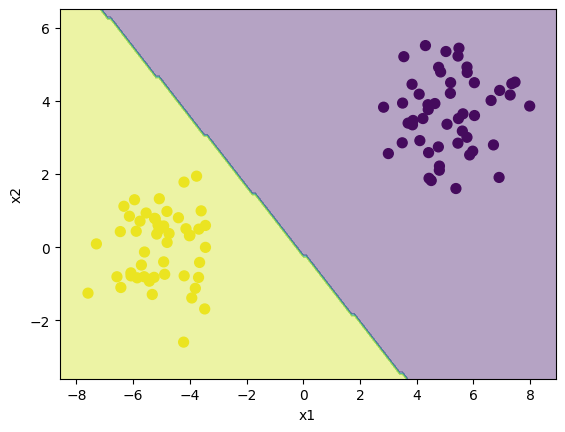

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.xlabel("x1")
plt.ylabel("x2")

# 데이터에서 최소 좌표와 최대 좌표를 계산한다. 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# 0.1 간격으로 메쉬 그리드 좌표를 만든다. 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
xx.shape,yy.shape
xx.ravel().shape  # , 123*91
np.c_[xx.ravel(), yy.ravel()].shape

# 메쉬 그리드 데이터에 대하여 예측을 한다. 
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z.shape
# 컨투어를 그린다. 
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()

---
# [DIY] 체중과 키의 분포를 이용한 성별 예측
 - Perceptron
 - Decision boundary
 